In [2]:
import pandas as pd
import numpy as np
import folium 
import requests
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

# Introduction: Business Problem

In ths project will try to find an optimal location for a restaurant. Specifically, this report will be targeted to stakeholders interested in opening an Indian Cusine restaurant in Delhi, India. Finding a suitable location for restaurants in major cities like delhi proves to be a daunting task. Various factors such as over-saturation or no demand ,for the type of restaurant that the customer wants to open, effect the success or failure of the restaurant. Hence, customers can bolster their decisions using the descriptive and predictive capabilites of data science.

We need to find locations(Neighborhood) that have a potentially unfulfilled demand for Indian Restaurant. Also, we need locations that have low competition and are not already crowded. We would also prefer location as close to popular city Neighborhood, assuming the first two conditions are met.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteira. Advantages of each area will then be clearly Expressed so that best possible final location can be chosen by stakeholders.

delhi_neibhourhood = pd.read_csv('/Users/e8cfm/Downloads/delhi.csv')

# Based on definition of our problem, factors that will influence our decission are:

number of existing restaurants in the neighborhood (any type of restaurant)
number of and distance to Indian restaurants in the neighborhood, if any
distance of neighborhood from popular neighborhoods
In our project we will:

acquire the names and boroughs of the neighborhoods by scrapping a wikipedia page.
Next, we use the foursquare API to find all types of restaurants within a 1000 meter radius for every neighborhood.

In [4]:
latitude = 28.6141793
longitude = 77.2022662

map_delhi = folium.Map(location=[latitude,longitude],zoom_start=11)


In [6]:
delhi_data = delhi_neibhourhood.dropna()
delhi_data.drop(['Unnamed: 0'],axis =1,inplace=True)

In [7]:
for lat, lng, label in zip(delhi_data['latitude'],delhi_data['longitude'],delhi_data['Neighborhood']):
    label = folium.Popup(label,parse_html = True)
    folium.CircleMarker(
        [lat,lng],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#3186cc',
        fil_opacity = 0.7,
        parse_html=False).add_to(map_delhi)
    
map_delhi
    

In [36]:
delhi_neibhourhood.head()

,Unnamed: 0,Borough,Neighborhood,latitude,longitude
0,0,North West Delhi,Adarsh Nagar,28.614192,77.071541
1,1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,2,North West Delhi,Azadpur,28.707657,77.175547
3,3,North West Delhi,Bawana,28.799660,77.032885
4,4,North West Delhi,Begum Pur,NaN,NaN


In [30]:
CLIENT_ID = '0NFMPEFXHGQRJAU1EMV4JLAVK3FY2DTUIQCNWIIF1XGCOTAF' # your Foursquare ID
CLIENT_SECRET = 'HVYBB4UNIIYLBRUNBYFE3YSQBOD41ZCZVP3YFYNL2OQFDGCP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 200
radius = 1000

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
       venues_list=[]
       for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            

        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&categoryId={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION,
        '4d4b7105d754a06374d81259',
        lat, 
        lng, 
        radius, 
        LIMIT)
            

        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except KeyError:
            continue

        venues_list.append([(
         name, 
        lat, 
        lng, 
        v['venue']['name'], 
        v['venue']['location']['lat'], 
        v['venue']['location']['lng'],  
        v['venue']['categories'][0]['name']) for v in results])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                'Neighborhood Latitude', 
                'Neighborhood Longitude', 
                'Venue', 
                'Venue Latitude', 
                'Venue Longitude', 
                'Venue Category']
    
        return(nearby_venues)

In [32]:
delhi_venues = getNearbyVenues(names=delhi_data['Neighborhood'],
                                   latitudes=delhi_data['latitude'],
                                   longitudes=delhi_data['longitude']
                                  )

Adarsh Nagar


In [38]:
delhi_restaurants = pd.read_csv('/Users/e8cfm/Downloads/restaurant.csv')

In [39]:
delhi_restaurants.head()

,Unnamed: 0,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,0,Adarsh Nagar,28.614193,77.071541,Eagle Boys Pizza,28.615595,77.070784,Pizza Place
1,1,Adarsh Nagar,28.614193,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
2,2,Adarsh Nagar,28.614193,77.071541,Bikano East Patel Nagar,28.616190,77.066978,Fast Food Restaurant
3,3,Adarsh Nagar,28.614193,77.071541,McDonald's,28.616330,77.067034,Fast Food Restaurant
4,4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant


In [40]:
delhi_restaurants.drop(['Unnamed: 0'],axis =1,inplace=True)

In [42]:
map_res = folium.Map(location=[latitude,longitude],zoom_start=11)

for lat, lng, label in zip(delhi_restaurants['Venue Latitude'],delhi_restaurants['Venue Longitude'],delhi_restaurants['Venue']):
    label = folium.Popup(label,parse_html = True)
    folium.CircleMarker(
        [lat,lng],
        radius = 2,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fil_opacity = 0.7,
        parse_html=False).add_to(map_delhi)
    
map_res

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adarsh Nagar,28.614193,77.071541,Eagle Boys Pizza,28.615595,77.070784,Pizza Place
1,Adarsh Nagar,28.614193,77.071541,Bikanerwala,28.613391,77.076084,Indian Restaurant
2,Adarsh Nagar,28.614193,77.071541,Bikano East Patel Nagar,28.616190,77.066978,Fast Food Restaurant
3,Adarsh Nagar,28.614193,77.071541,McDonald's,28.616330,77.067034,Fast Food Restaurant
4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant
...,...,...,...,...,...,...,...
844,Tilak Nagar,28.639650,77.094039,CCD tilak nagar,28.636264,77.097048,Café
845,Vikaspuri,28.638419,77.070836,Domino's Pizza,28.638000,77.075000,Pizza Place
846,Vikaspuri,28.638419,77.070836,McDonald's,28.639752,77.075190,Fast Food Restaurant
847,Vikaspuri,28.638419,77.070836,Asian Garden,28.639661,77.074482,Indian Restaurant


In [43]:
# one hot encoding
delhi_onehot = pd.get_dummies(delhi_restaurants[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
delhi_onehot['Neighborhood'] = delhi_restaurants['Neighborhood'] 

In [44]:
first_col = delhi_onehot.pop('Neighborhood')

In [45]:
delhi_onehot.insert(0,'Neighborhood',first_col)

In [56]:
delhi_grouped = delhi_onehot.groupby('Neighborhood').mean().reset_index()
delhi_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Awadhi Restaurant,BBQ Joint,Bagel Shop,Bakery,...,Soup Place,South Indian Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Adarsh Nagar,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alaknanda,0.0,0.0,0.00,0.0,0.0,0.0,0.222222,0.0,0.00,...,0.000000,0.00,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Anand Vihar,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.166667,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ashok Vihar,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.25,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Azadpur,0.0,0.0,0.25,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,Vasundhara Enclave,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.25,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,Vikaspuri,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,Vivek Vihar,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,Wazirabad,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,...,0.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = delhi_grouped['Neighborhood']

for ind in np.arange(delhi_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(delhi_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adarsh Nagar,Fast Food Restaurant,Pizza Place,Indian Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
1,Alaknanda,BBQ Joint,Indian Restaurant,New American Restaurant,Restaurant,Middle Eastern Restaurant,Pizza Place,Steakhouse,Deli / Bodega,Dhaba,Dim Sum Restaurant
2,Anand Vihar,Indian Restaurant,Pizza Place,Indian Sweet Shop,Soup Place,Punjabi Restaurant,Vegetarian / Vegan Restaurant,Donut Shop,Deli / Bodega,Dhaba,Dim Sum Restaurant
3,Ashok Vihar,Indian Restaurant,Bakery,Diner,Falafel Restaurant,Dhaba,Dim Sum Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
4,Azadpur,Café,Argentinian Restaurant,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop


In [59]:
kclusters = 5

delhi_grouped_clustering = delhi_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(delhi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 0, 0, 1, 2, 0, 0, 0, 0, 3], dtype=int32)

In [62]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

delhi_merged = delhi_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
delhi_merged = delhi_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

delhi_merged.dropna(inplace=True)
delhi_merged.head() # check the last columns!

,Borough,Neighborhood,latitude,longitude,Cluster Label,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North West Delhi,Adarsh Nagar,28.614192,77.071541,3.0,3.0,Fast Food Restaurant,Pizza Place,Indian Restaurant,Vegetarian / Vegan Restaurant,Dumpling Restaurant,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
1,North West Delhi,Ashok Vihar,28.699453,77.184826,1.0,1.0,Indian Restaurant,Bakery,Diner,Falafel Restaurant,Dhaba,Dim Sum Restaurant,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant
2,North West Delhi,Azadpur,28.707657,77.175547,2.0,2.0,Café,Argentinian Restaurant,Indian Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Eastern European Restaurant,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop
8,North West Delhi,Keshav Puram,28.688926,77.161683,2.0,2.0,Gastropub,Indian Restaurant,Café,Bakery,Food Truck,Food Stand,Food Court,Food,Fish & Chips Shop,Fast Food Restaurant
10,North West Delhi,Kohat Enclave,28.698041,77.140539,1.0,1.0,Indian Restaurant,Bakery,Food Court,Food,Eastern European Restaurant,Dhaba,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop


In [63]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(delhi_merged['latitude'], delhi_merged['longitude'], delhi_merged['Neighborhood'], delhi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [64]:
clusterdata = pd.merge(delhi_onehot.groupby('Neighborhood').sum(),delhi_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
clusterdata = clusterdata.iloc[:,1:].groupby('Cluster Labels').sum().transpose()
clusterdata.head()

Cluster Labels,0.0,1.0,2.0,3.0,4.0
Afghan Restaurant,9,0,1,0,0
American Restaurant,1,2,9,1,0
Argentinian Restaurant,0,0,1,0,0
Asian Restaurant,4,2,14,1,0
Australian Restaurant,0,0,1,0,0


In [65]:
import seaborn as sns

In [66]:
def plot_bar(clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(20,10)})
    df = clusterdata[[clusternumber]].drop(clusterdata[[clusternumber]][clusterdata[clusternumber]==0].index)
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

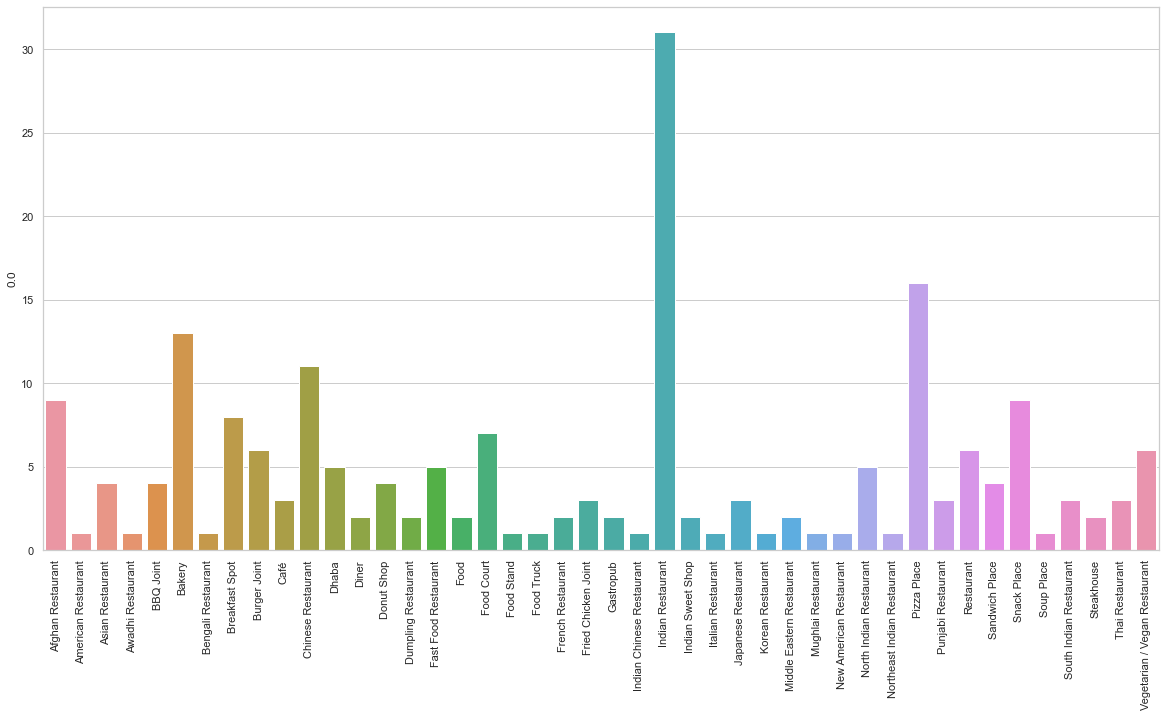

In [68]:
plot_bar(0)

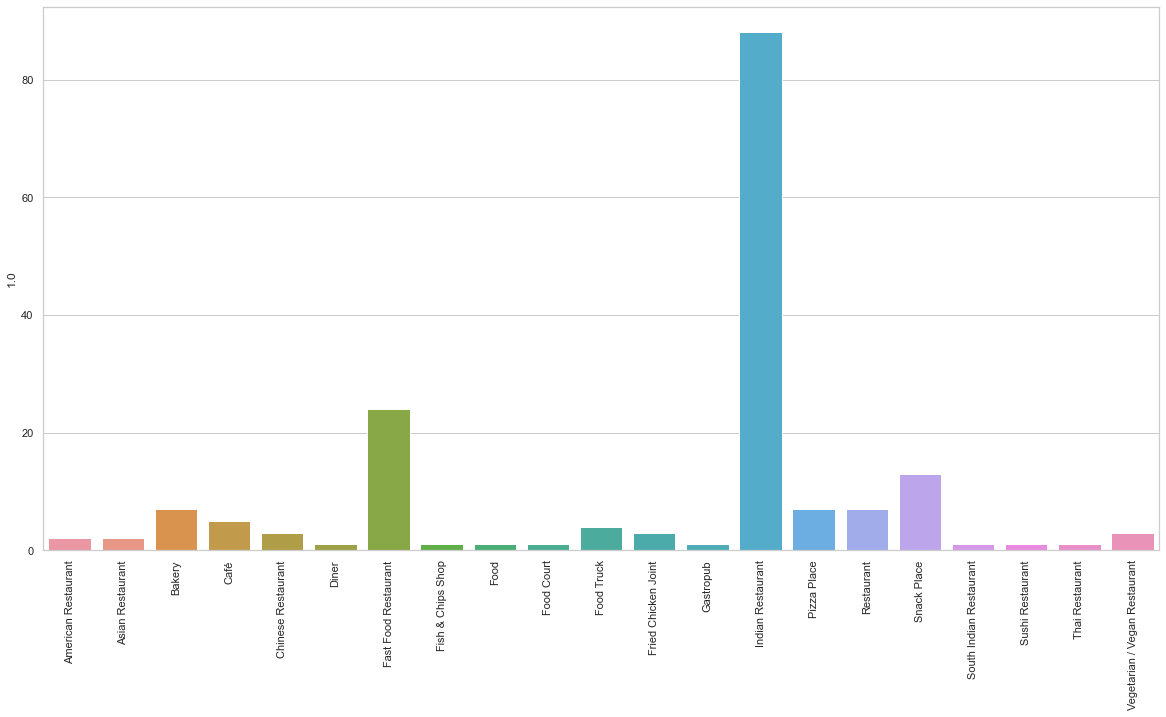

In [69]:
plot_bar(1)

Now, as clusters 1 and 2 have a maximum number of Indian Restaurants, we will focus our search on neighborhoods within these two clusters.
Now, clusters 2 and 3 may collectively have the highest number of indian restaurant but there will be some neighborhoods in these clusters which would have a demand for Indian Restaurants, as these neighborhoods are in the same cluster, but would not have enough supply.

In [75]:
forheatmap=delhi_restaurants.copy()
forheatmap=pd.merge(forheatmap,delhi_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
forheatmap.drop(forheatmap[~forheatmap['Cluster Labels'].isin([1,2])].index, inplace=True)

In [76]:
forheatmap.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
4,Ashok Vihar,28.699453,77.184826,Nat Khat Caterers,28.699630,77.187832,Indian Restaurant,1.0
5,Ashok Vihar,28.699453,77.184826,Bakers Stop,28.700495,77.188716,Bakery,1.0
6,Ashok Vihar,28.699453,77.184826,Invitation Banquet,28.696018,77.185953,Diner,1.0
7,Ashok Vihar,28.699453,77.184826,Gola Northend,28.701242,77.189288,Indian Restaurant,1.0
8,Azadpur,28.707657,77.175547,jungrele,28.705655,77.172069,Argentinian Restaurant,2.0


In [77]:
from folium.plugins import HeatMap

In [78]:
#heat map of all restaurants in selected Neighborhoods
res_heat = folium.Map(location=[latitude, longitude], zoom_start=11)
HeatMap(list(zip(forheatmap['Venue Latitude'],forheatmap['Venue Longitude'])),
        min_opacity=0.2,
        radius=10, blur=15,
        max_zoom=1
       ).add_to(res_heat)
for lat, lng, label in zip(forheatmap['Neighborhood Latitude'], forheatmap['Neighborhood Longitude'], forheatmap['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(res_heat)
res_heat


In [79]:
forindres = forheatmap[forheatmap['Venue Category']=='Indian Restaurant']

# heat map for Indian Restaurants in the selected Neighborhoods
res_heat_ind = folium.Map(location=[latitude, longitude], zoom_start=11)
HeatMap(list(zip(forindres['Venue Latitude'],forindres['Venue Longitude'])),
        min_opacity=0.2,
        radius=10, blur=15,
        max_zoom=1
       ).add_to(res_heat_ind)
for lat, lng, label in zip(forindres['Neighborhood Latitude'], forindres['Neighborhood Longitude'], forindres['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(res_heat_ind)
res_heat_ind

now we will remove all neighborhoods with the following conditions:

Number of Indian restaurants >30%
Number of all restaurants >60%
'%' here refers to percentile

In [80]:
count_all = forheatmap[['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue')
target_count = int(0.6*len(count_all))
print(count_all.iloc[target_count])
count_all.drop(count_all[count_all.Venue.values>7].index,inplace=True)
count_all.columns=['all count']
count_all.head()


Venue    6
Name: Karol Bagh, dtype: int64


,all count
Neighborhood,
Vivek Vihar,1
Roshanara Bagh,1
Pragati Maidan,1
Inderpuri,2
Paschim Vihar,2


In [81]:
count_ind = forheatmap[forheatmap['Venue Category']=="Indian Restaurant"][['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue')
target_count = int(0.3*len(count_ind))
print(count_ind.iloc[target_count])
count_ind.drop(count_ind[count_ind.Venue.values>1].index,inplace=True)
count_ind.columns = ['ind count']
count_ind.head()

Venue    2
Name: Pandav Nagar, dtype: int64


,ind count
Neighborhood,
Vivek Vihar,1
Keshav Puram,1
Lajpat Nagar,1
Maharani Bagh,1
Mayur Vihar,1


In [82]:
lowdensity = count_all.join(count_ind)
lowdensity.index.values

array(['Vivek Vihar', 'Roshanara Bagh', 'Pragati Maidan', 'Inderpuri',
       'Paschim Vihar', 'New Friends Colony', 'Jor Bagh', 'Khanpur',
       'Kishangarh Village', 'Mayur Vihar', 'Jhilmil Colony',
       'Pandav Nagar', 'Naraina', 'Meera Bagh', 'Maharani Bagh',
       'Vikaspuri', 'Pitam Pura', 'Rangpuri', 'Rani Bagh', 'Netaji Nagar',
       'Neeti Bagh', 'Ashok Vihar', 'Lahori Gate', 'Azadpur', 'Jasola',
       'Daryaganj', 'Jhandewalan', 'Gulmohar Park', 'Sarvodaya Enclave',
       'Chawri Bazaar', 'Patparganj', 'Dilshad Garden', 'Keshav Puram',
       'Laxmi Nagar', 'Civil Lines', 'Janakpuri', 'Moti Nagar',
       'Karol Bagh', 'Hauz Khas', 'Mahipalpur', 'East of Kailash',
       'Shakarpur', 'Shahpur Jat'], dtype=object)

In [84]:
temp_recommend = delhi_data.copy()
temp_recommend.drop(temp_recommend[~temp_recommend['Neighborhood'].isin(lowdensity.index.values)].index, inplace=True)
temp_recommend.head()

,Borough,Neighborhood,latitude,longitude
1,North West Delhi,Ashok Vihar,28.699453,77.184826
2,North West Delhi,Azadpur,28.707657,77.175547
8,North West Delhi,Keshav Puram,28.688926,77.161683
13,North West Delhi,Pitam Pura,28.703268,77.132250
14,North West Delhi,Rani Bagh,28.685982,77.132524


In [85]:
top_nei = delhi_restaurants[['Neighborhood','Venue']].groupby('Neighborhood').count().sort_values(by='Venue', ascending=False).head(3).index.values
top_nei

array(['Connaught Place', 'Khirki Village', 'Hauz Khas Village'],
      dtype=object)

In [89]:
toplatlng = delhi_data[['Neighborhood','latitude','longitude']][delhi_data['Neighborhood'].isin(top_nei)].reset_index()
toplatlng

,index,Neighborhood,latitude,longitude
0,68,Connaught Place,28.631383,77.219792
1,107,Hauz Khas Village,28.553855,77.194713
2,116,Khirki Village,28.529885,77.218077


In [90]:
from math import sin, cos, sqrt, atan2, radians

def distanceInKM(la1,lo1,la2,lo2):
    # approximate radius of earth in km
    R = 6373.0
    
    lat1 = radians(la1)
    lon1 = radians(lo1)
    lat2 = radians(la2)
    lon2 = radians(lo2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    dis = R * c
    return round(dis,4)

print("Result:", distanceInKM(toplatlng.iloc[2]['latitude'],toplatlng.iloc[2]['longitude'],toplatlng.iloc[0]['latitude'],toplatlng.iloc[0]['longitude']))

Result: 11.2908


In [91]:
temp_recommend.reset_index(inplace=True)

In [92]:
temp_recommend.drop(columns=['index','Borough'], inplace=True)

In [93]:
temp_recommend.head()

,Neighborhood,latitude,longitude
0,Ashok Vihar,28.699453,77.184826
1,Azadpur,28.707657,77.175547
2,Keshav Puram,28.688926,77.161683
3,Pitam Pura,28.703268,77.132250
4,Rani Bagh,28.685982,77.132524


In [94]:
for i in toplatlng.index:
    temp_recommend[toplatlng.iloc[i]['Neighborhood']] = temp_recommend.apply(lambda x : distanceInKM(toplatlng.iloc[i]['latitude'],toplatlng.iloc[i]['longitude'],x['latitude'],x['longitude']),axis=1)

In [95]:
temp_recommend.head()

,Neighborhood,latitude,longitude,Connaught Place,Hauz Khas Village,Khirki Village
0,Ashok Vihar,28.699453,77.184826,8.3050,16.2236,19.1385
1,Azadpur,28.707657,77.175547,9.5196,17.2094,20.2048
2,Keshav Puram,28.688926,77.161683,8.5518,15.3662,18.5274
3,Pitam Pura,28.703268,77.132250,11.7016,17.7027,21.0274
4,Rani Bagh,28.685982,77.132524,10.4610,15.9015,19.2680


In [96]:
# top 5 neighborhoods near Connaught Place
neiNearCP = temp_recommend.sort_values(by=['Connaught Place']).iloc[:,:3].head().set_index('Neighborhood')
neiNearCP

,latitude,longitude
Neighborhood,,
Chawri Bazaar,28.649927,77.229788
Pragati Maidan,28.623459,77.242512
Jhandewalan,28.644336,77.199927
Daryaganj,28.646090,77.243048
Lahori Gate,28.656841,77.218534


In [97]:
# top 5 neighborhoods near Hauz Khas Village
neiNearHK = temp_recommend.sort_values(by=['Hauz Khas Village']).iloc[:,:3].head().set_index('Neighborhood')
neiNearHK

,latitude,longitude
Neighborhood,,
Hauz Khas,28.544256,77.206707
Gulmohar Park,28.557101,77.213006
Sarvodaya Enclave,28.537478,77.202089
Shahpur Jat,28.548330,77.214104
Neeti Bagh,28.559251,77.216166


In [98]:
# top 5 neighborhoods near Khirki Village
neiNearKV = temp_recommend.sort_values(by=['Khirki Village']).iloc[:,:3].head().set_index('Neighborhood')
neiNearKV

,latitude,longitude
Neighborhood,,
Sarvodaya Enclave,28.537478,77.202089
Hauz Khas,28.544256,77.206707
Shahpur Jat,28.548330,77.214104
Khanpur,28.512798,77.232395
Gulmohar Park,28.557101,77.213006


In [99]:
final_recommend=neiNearCP.append(neiNearHK).append(neiNearKV).reset_index()
final_recommend.drop_duplicates(inplace=True)
final_recommend.reset_index(inplace=True)
final_recommend.drop(columns=['index'],inplace=True)
final_recommend

,Neighborhood,latitude,longitude
0,Chawri Bazaar,28.649927,77.229788
1,Pragati Maidan,28.623459,77.242512
2,Jhandewalan,28.644336,77.199927
3,Daryaganj,28.646090,77.243048
4,Lahori Gate,28.656841,77.218534
5,Hauz Khas,28.544256,77.206707
6,Gulmohar Park,28.557101,77.213006
7,Sarvodaya Enclave,28.537478,77.202089
8,Shahpur Jat,28.548330,77.214104
9,Neeti Bagh,28.559251,77.216166


In [100]:
final = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(final_recommend['latitude'], final_recommend['longitude'], final_recommend['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(final)  
    
final

Results and Discussions

Our Analysis was done on over 186 neighborhoods, containing over 848 restaurants within 2km radius of every neighborhood. We segragated these neighborhoods on the basis of types and amounts of restaurants. Five clusters were obtained, each having a unique collection of restaurants. Since, we were focused on finding optimal neighborhoods for opening Indian restaurants, we selected cluster 2 and 3 which had the highest number of Indian restaurants. The above actions left us with the only those neighborhoods that had a shared characteristics of and that had a high demand for Indian restaurants.

Next, we plotted a heat map for analysing the density of restaurants in the remaining neighborhoods. This allowed us to select neighborhoods that had few or no Indian restaurants and were not overcrowded by other kinds of restaurants. A total of 57 neighborhoods were left. After this, we found out the top three most popular neighborhoods(namely: Canaught Place, Hauz khas Village and Khirki Village), and the distance of every remaining neighborhoods from all three of them. Then, we extracted top 5 closest neighborhoods from each of three most popular neighborhoods mentioned above. Taking the union of the resulting three dataset we get 11 neighborhoods that satisfy all three conditons layed out in the business problem by the customer.

The neighborhoods recommendation obtained here are not completely accurate. This is due to the limitations in the dataset used in the project. Due to lack of cross referencing sources, we may have missed a few neighborhoods from our consideration. The foursquare API does not contain, or does not rely, a comprehensive dataset about the restaurants present in delhi. Surely, in a city like Delhi with a population of over 19 million, there are much more restaurants than 848.